<a href="https://colab.research.google.com/github/victorviro/ML_algorithms_python/blob/master/Introduction_linear_regression_and_regularized_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Generalized Linear Models (GLM)

We will use a dataset that contains data about houses for practice purposes. We will try to predict the house prices using different linear regression models (the data used and the info of the task can be seen [here](https://github.com/victorviro/House-price-prediction-python)).


* **3. Data preparation**
    * 3.1 Dummy variables
    * 3.2 Split dataset
    
    
* **4. Generalized Linear Models**
    * 4.1 Introduction
    * 4.2 Linear regression
    * 4.3 Polynomial regression
    * 4.4 Regularized linear models 
    * 4.5 Robustness regression 
    * 4.6 Stochastic Gradient Descent

We import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, \
                                 SGDRegressor, HuberRegressor, LogisticRegression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Read data 

In [7]:
dataset = pd.read_csv('/content/drive/My Drive/datasets/dataset.csv')
dataset.shape

(1456, 80)

In [8]:
dataset.head(4)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,None,3,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,2,196.0,4,3,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,5,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,12.247699
1,1,20,RL,80.0,9600,Pave,None,3,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,0.0,3,3,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,12.109016
2,2,60,RL,68.0,11250,Pave,None,2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,2,162.0,4,3,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,5,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,12.317171
3,3,70,RL,60.0,9550,Pave,None,2,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,0.0,3,3,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,4,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,11.849405


# 3. Data preparation



We  convert categorical variables to dummy variables. 

In [9]:
dataset = pd.get_dummies(dataset)
print(dataset.shape)

(1456, 230)


We split data in training and testing datasets.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(dataset.drop('SalePrice', axis=1),dataset.SalePrice,test_size=0.33,random_state=66)


#  4. Generalized Linear Models

## 4.1 Introduction




The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation,

$$\hat{y}(\theta,x)=\theta_{0}+\theta_{1}x_{1}+...+\theta_{n}x_{n}$$
- $\hat{y}$ is the predicted value.
- $n$ is the number of features (independent variables).
- $x_i$ is the $i$th feature.
- $\theta_j$ is the $j$th model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1,...,\theta_n$).

This equation can be written using a vectorized form $\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})= \boldsymbol{\theta}\boldsymbol{x}$

- $\boldsymbol{\theta}$ is the models's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1,...,\theta_n$.
- $\boldsymbol{x}$ is the instance’s feature vector, containing $x_0$ to $x_n$ , with $x_0$ always equal to 1.
- $\boldsymbol{\theta}\boldsymbol{x}$ is the dot product of the vectors $\boldsymbol{\theta}$ and $\boldsymbol{x}$.

**Notation** Vectors are often represented as column vectors. If $\boldsymbol{\theta}$ and $\boldsymbol{x}$ are column vectors, then the prediction is: $\hat{y}= \boldsymbol{\theta^T}\boldsymbol{x}$, where $\boldsymbol{\theta^T}$ is the transpose of $\boldsymbol{\theta}$ (a row vector instead of a column vector) and $\boldsymbol{\theta^T}\boldsymbol{x}$ is the matrix multiplication of $\boldsymbol{\theta^T}$ and $\boldsymbol{x}$ .

## 4.2 LinearRegression



That’s the linear regression model. Recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well the model fits the training data. The most common performance measure of a regression model is the Mean Square Error (MSE) (the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation). Therefore, to train a linear regression model, you need to find the value of $\boldsymbol{\theta}$ that minimizes the MSE. 


$$\text{MSE}(\boldsymbol{\theta})= \frac{1}{m}\sum_{i=1}^{m} (e^{(i)})^2 =  \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2=\frac{1}{m}\sum_{i=1}^{m}(\boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)})^2$$

To find the value of $\boldsymbol{\theta}$ that minimizes the cost function (MSE), there is an explicit solution (a mathematical equation that gives the result directly). This is called the **Normal Equation** and can be calculated using the ordinary least squares method (minimizing the MSE  by
explicitly taking its derivatives with respect to the $\theta_j$’s, and setting them to zero).

$$\boldsymbol{\hat{\theta}}=(\boldsymbol{X^T}\boldsymbol{X})^{-1}\boldsymbol{X^T}\boldsymbol{y}$$

where $\boldsymbol{\hat{\theta}}$ is the value of $\boldsymbol{\theta}$ that minimizes the cost function, $\boldsymbol{y}$ is the vector of target values and $\boldsymbol{X}$ is the matrix of data where the columns represent the independent variables $\boldsymbol{X_1},...,\boldsymbol{X_n}$ ($\boldsymbol{X_0}$ is a 1's vector column corresponding to the bias/intercept term).

The `LinearRegression` class implemented in Scikit-learn is based on the `scipy.linalg.lstsq()` function which computes $\boldsymbol{\hat{\theta}}=\boldsymbol{X^+}\boldsymbol{y}$ where $\boldsymbol{X^+}$ is the *pseudoinverse* of $\boldsymbol{X}$ (specifically the Moore-Penrose inverse). The pseudoinverse is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD). This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $\boldsymbol{X^T}\boldsymbol{X}$ is not invertible (singular), such as if $m< p$  or if some features are redundant, but the pseudoinverse is always defined. The computational complexity of inverting the matrix $\boldsymbol{X^T}\boldsymbol{X}$ is bigger than the SVD approach used by Scikit-Learn’s `LinearRegression` class. Both the Normal Equation and the SVD approach get very slow when the number of features grows large ($100000$). On the positive side, both are linear with regards to the number of instances in the training set, so they handle large training sets efficiently.

The coefficient estimates for Ordinary Least Squares rely on the independence of the features among other assumptions like the normality of the errors. When features are correlated and the columns of the design matrix $\boldsymbol{X}$ have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of [*multicollinearity*](https://en.wikipedia.org/wiki/Multicollinearity) can arise, for example, when data are collected without an experimental design.

We can train the model using fewer variables. For that, we can use different techniques to choose the most relevant variables. We can use algorithms of feature selection before to run our models or we can apply directly models which do the selection of variables innerly like regularized linear models. We could use PCA to reduce variables without loss information but we will lose certain interpretability of the model.


In [11]:
# We choose the model
model = LinearRegression()

# We train the model
fit_regression = model.fit(x_train, y_train)

In [12]:
# We show the coefficient of determination R^2, which is the proportion of the variance in the dependent variable that is 
# predictable/explained from the independent variables.
print('Explained variance in training set: %.3f' % fit_regression.score(x_train, y_train))
print('Explained variance in test set: %.3f' % fit_regression.score(x_test, y_test))

# We see the mean squared error
y_pred_train = fit_regression.predict(x_train)
y_pred_test = fit_regression.predict(x_test)
print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.950
Explained variance in test set: 0.899
Mean squared error in training set: 0.0082
Mean squared error in test set: 0.0144


Note that there are very different ways to train a linear regression model, better suited for cases where there are a large number of features or too many training instances. For example, if the training set has a large number of features we could train the linear model using an optimization algorithm like gradient descent instead using the normal equation or the SVD approach used by `LinearRegression` class implemented in Scikit-learn. Later we will use the stochastic gradient descent algorithm implemented Scikit-learn by `SGDRegressor` class to train our model.

### Assumptions

- We assume that the target variable (dependent variable) and the inputs (independent variables) are related **linearly**, this is, verify the equation $y^{(i)}=\boldsymbol{\theta}^T\boldsymbol{x}^{(i)}+\epsilon^{(i)}$, where $\epsilon^{(i)}$ is an error term that captures either unmodeled effects (such as some important features left out of the model), or random noise.

- We assume that the $\epsilon^{(i)}$ are distributed IID (independently and identically distributed) according to a Gaussian distribution (Normal distribution) with mean zero and some variance $\sigma^2$. We can write this assumption as $\epsilon^{(i)}\sim \mathcal{N}(0,\sigma^2)$. The assumption that the variance of residual is the same for any observation is known as **homocedasticity**.

- Observations are independent of each other.

Violations of the basic assumptions and model adequacy can be easily investigated by the examination of residuals. A check of the normality assumption could be made by plotting a histogram of the residuals or a normal probability plot (we also can use statistical test to check the normality of the residuals). If the model is correct and the assumptions are satisfied, the residuals should be structureless; in particular, they should be unrelated to any other variable including the predicted response. A simple check is to plot the residuals versus the fitted values. This plot should not reveal any obvious pattern (there are also statistical tests to check the homoicedasticity of the residuals).



### Probabilistic interpretation of linear regression model

By the assumptions in the regression model we have that $\epsilon^{(i)}\sim \mathcal{N}(0,\sigma^2)$ and  $y^{(i)}=\boldsymbol{\theta}^T\boldsymbol{x}^{(i)}+\epsilon^{(i)}$. Hence, $y^{(i)}|\boldsymbol{x}^{(i)};\boldsymbol{\theta} \sim \mathcal{N}(\boldsymbol{\theta}^T\boldsymbol{x}^{(i)},\sigma^2)$.

The probability of the data is given by
$p(\boldsymbol{y}|\boldsymbol{X}; \boldsymbol{\theta})$. This quantity is typically viewed a function of $\boldsymbol{y}$ (and perhaps $\boldsymbol{X}$),for a fixed value of $\boldsymbol{\theta}$. When we wish to explicitly view this as a function of $\boldsymbol{\theta}$, we call it the **likelihood** function:

$$L(\boldsymbol{\theta})=L(\boldsymbol{\theta};\boldsymbol{X},\boldsymbol{y})=p(\boldsymbol{y}|\boldsymbol{X}; \boldsymbol{\theta})$$

Now, what is a reasonable way of choosing our best guess of the parameters $\boldsymbol{\theta}$? The principal of maximum likelihood says that we should choose $\boldsymbol{\theta}$ so as to make the data as high probability as possible. This is, we should choose $\boldsymbol{\theta}$ to
maximize $L(\boldsymbol{\theta})$. The derivations will be a bit simpler if we instead maximize the log likelihood,  $\text{log}L(\boldsymbol{\theta})$. Taking its derivatives with respect to the parameters, and setting them to zero we could get the normal equation again. So, under the probabilistic assumptions on the data, least-squares regression and maximum likelihood give us the same estimation of the parameters $\boldsymbol{\theta}$. 



## 4.3 Polynomial regression

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$y(\theta_,x)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$y(\theta_,x)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{1}x_{2}+\theta_{4}x_{1}^{2}+\theta_{5}x_{2}^{2}$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new set of features

$$z=[x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2}]$$

With this re-labeling of the data, our problem can be written

$$y(\theta_,x)=\theta_{0}+\theta_{1}z_{1}+\theta_{2}z_{2}+\theta_{3}z_{3}+\theta_{4}z_{4}+\theta_{5}z_{5}$$

We see that the resulting polynomial regression is in the same class of linear models we considered above and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.


Here is an example of applying this idea to one-dimensional data, using polynomial features. First, let’s generate some nonlinear data, based on a simple quadratic equation.



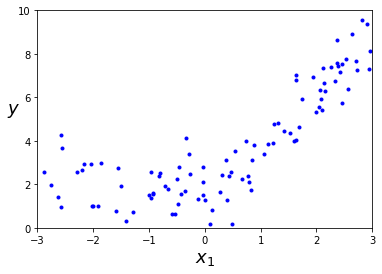

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

A straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square ($2^{\text{nd}}$-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

**Note**: `PolynomialFeatures(degree=d)` generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree $d$. Specifically, it transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ 
features, where $n!$ is the [factorial](https://en.wikipedia.org/wiki/Factorial) of $n$. Beware of the combinatorial explosion of the number of features!

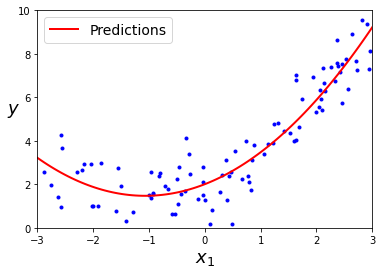

In [14]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

`X_poly` contains the original feature of $X$ plus the square of this feature. Then we fit a `LinearRegression` model to this extended training data.

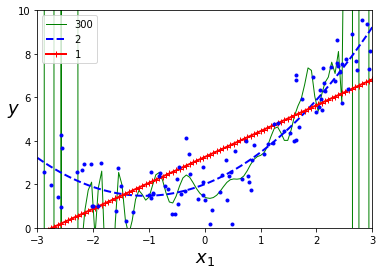

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()




A high-degree Polynomial Regression model would be severely overfitting the training data, while a linear model would be underfitting it. The model that will generalize best is the quadratic model.

How can you decide how complex your model should be? If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting.

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set.

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

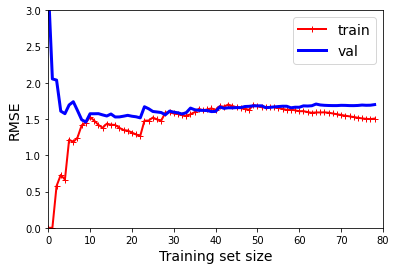

In [17]:

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()  

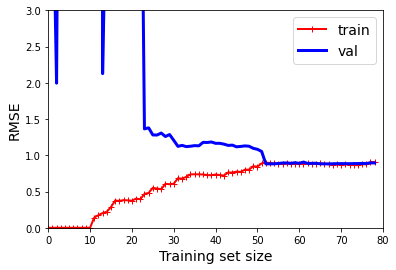

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]) 
plt.show()                        

## 4.4  Regularized linear models 

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Lasso Regression, Ridge Regression, and Elastic Net, which implement three different ways to constrain the weights.

### 4.4.1 Lasso 

Least Absolute Shrinkage and Selection Operator Regression (simply called *Lasso Regression*) is a linear model that estimates sparse coefficients. An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

Mathematically, it consists of a linear model with an added regularization term to the cost function. The objective function to minimize is:


$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta})+ \alpha \sum_{i=1}^{n}|\theta_i|$$


Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not 0). If we define $\boldsymbol{\omega}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $||\boldsymbol{\omega}||_{1}$, where $||\boldsymbol{\omega}||_{1}$ represents the $l_1$ norm of the weight vector.

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha||\boldsymbol{\omega}||_{1}$ added, where $\alpha$ is a constant. The parameter $\alpha$ controls the degree of sparsity of the estimated coefficients.

The Lasso cost function is not differentiable at $\theta_i = 0$, but Gradient
Descent still works fine if you use a [subgradient vector](http://www.cs.cmu.edu/~ggordon/10725-F12/slides/08-general-gd.pdf) instead when any $\theta_i = 0$.

It is important to scale the data (e.g., using a `StandardScaler`) before performing Lasso Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

The implementation in the class `Lasso` uses [coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent) as the algorithm to fit the coefficients. Note that you could instead use an `SGDRegressor(penalty="l1")`.

In [19]:
# We scale regresor variables (target variable has already scaled)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model
model = Lasso(alpha=0.004)

# We train the model
fit_lasso = model.fit(x_train_scaled, y_train)


In [20]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_lasso.score(x_train_scaled, y_train))
print('Explained variance in test set: %.3f' % fit_lasso.score(x_test_scaled, y_test))

# Mean squared error
y_pred_train = fit_lasso.predict(x_train_scaled)
y_pred_test = fit_lasso.predict(x_test_scaled)

print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.940
Explained variance in test set: 0.910
Mean squared error in training set: 0.0099
Mean squared error in test set: 0.0129


All linear models find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score (this assumes that the input variables have the same scale or have been scaled prior to fitting a model). We can visualize the importance of each feature in the model.

In [21]:
dict_importance_lasso = {'Features':list(x_train), 'Importance': abs(fit_lasso.coef_)}
df_importance_lasso = pd.DataFrame(dict_importance_lasso)
df_importance_lasso_sorted = df_importance_lasso.sort_values(by=['Importance'], ascending=False)
df_importance_lasso_sorted.head(10)

,Features,Importance
26,GrLivArea,0.137254
5,OverallQual,0.077224
7,YearBuilt,0.041901
21,TotalBsmtSF,0.037603
6,OverallCond,0.033083
17,BsmtFinSF1,0.031941
35,Functional,0.026043
40,GarageCars,0.025343
58,MSZoning_RM,0.019265
187,CentralAir_N,0.016853


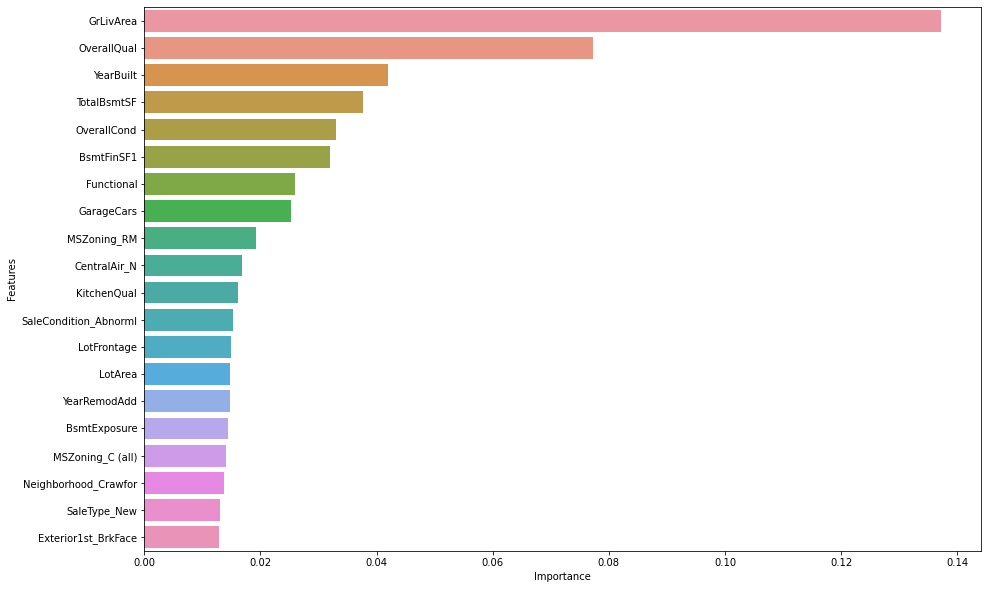

In [22]:
# plot importance of the features
plt.figure(figsize=(15, 10))
sns.barplot(data=df_importance_lasso_sorted.head(20), x='Importance', y = 'Features')

We show all the coefficients or weights of the model. Notice that only a few weights are nonzero.

In [23]:
print(fit_lasso.coef_)

[-0.00000000e+00 -0.00000000e+00  1.48779509e-02  1.47859830e-02
 -3.14823170e-03  7.72238638e-02  3.30831823e-02  4.19010245e-02
  1.47140140e-02  3.87533663e-03  0.00000000e+00  6.46870647e-03
 -0.00000000e+00  4.60454263e-03 -0.00000000e+00  1.44137771e-02
  1.88483229e-03  3.19408451e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.76033678e-02  8.35173709e-03  6.78922799e-04
  0.00000000e+00 -0.00000000e+00  1.37254064e-01  8.48967081e-03
  0.00000000e+00  6.92536808e-03  2.64440870e-03  0.00000000e+00
 -6.66367024e-03  1.61863793e-02  0.00000000e+00  2.60433316e-02
  2.08584595e-04  1.21293560e-02  0.00000000e+00  0.00000000e+00
  2.53433603e-02  8.89972648e-03  4.41957908e-03  0.00000000e+00
  7.37436041e-03  7.90984138e-03  9.85883809e-04  0.00000000e+00
  1.18960471e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.40035129e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.92648092e-02 -0.00000000e+00
  0.00000000e+00 -0.00000

`LassoCV` is used to estimate the parameter using cross-validation.
For high-dimensional datasets with many collinear features, `LassoCV` is most often preferable.



In [24]:
model_lassoCV = LassoCV( alphas=np.arange(0.001,0.5,0.001), cv=5, random_state=0, max_iter=10000)

# We train the model
fit_lassoCV = model_lassoCV.fit(x_train_scaled, y_train)

print(fit_lassoCV.alpha_)



0.004


### 4.4.2 Ridge 

*Ridge regression* addresses some of the problems of ordinary least squares by imposing a penalty on the size of the coefficients. A regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

The ridge coefficients minimize a penalized residual sum of squares:


$$ J(\boldsymbol{\theta})= \text{MSE}(\boldsymbol{\theta})+ \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$$

Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not 0). If we define $\boldsymbol{\omega}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $\frac{1}{2}||\boldsymbol{\omega}||_{2}^{2}$, where $||\boldsymbol{\omega}||_{2}$ represents the $l_2$ norm of the weight vector.


The complexity hyperparameter $\alpha < 0$ controls how much you want to regularize the model: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity. If $\alpha=0$ then Ridge Regression is just Linear Regression.



**Note**: As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent (using `SGDRegressor` and selecting `penalty="l2"`). The pros and cons are the same. The next equation shows the closed-form solution (where $\boldsymbol{A}$ is the $(n + 1) × (n + 1)$ [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix#:~:text=In%20linear%20algebra%2C%20the%20identity,trivially%20determined%20by%20the%20context.) except with a 0 in the top-left cell, corresponding to the bias term).

$$\boldsymbol{\hat{\theta}}=(\boldsymbol{X^T}\boldsymbol{X}+\alpha\boldsymbol{A})^{-1}\boldsymbol{X^T}\boldsymbol{y}$$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of the previous equation using a matrix factorization technique by André-Louis Cholesky).

In [25]:
# We choose the model
model = Ridge(alpha=1, solver="cholesky")

# We train the model
fit_ridge = model.fit(x_train_scaled, y_train)

In [26]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_ridge.score(x_train_scaled, y_train))
print('Explained variance in test set: %.3f' % fit_ridge.score(x_test_scaled, y_test))

# Mean squared error
y_pred_train = fit_ridge.predict(x_train_scaled)
y_pred_test = fit_ridge.predict(x_test_scaled)

print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.950
Explained variance in test set: 0.899
Mean squared error in training set: 0.0082
Mean squared error in test set: 0.0144


We could use `RidgeCV` that implements ridge regression with built-in cross-validation of the `alpha` parameter similarly to `LassoCV`.

### 4.4.3 ElasticNet


ElasticNet is a linear regression model trained with both $l_{1}$ and $l_{2}$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of $l_{1}$ and $l_{2}$ using the $r$ parameter. When $r=0$, Elastic Net is equivalent to Ridge Regression, and when $r=1$, it is equivalent to Lasso Regression

Elastic-net is useful when multiple features are correlated with one another. Lasso is likely to pick one of these at random, while elasticnet is likely to pick both.

The objective function to minimize in this case is:


$$J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta}) + \alpha r\sum_{i=1}^{n}|\theta_i|+\frac{\alpha(1-r)}{2}\sum_{i=1}^{n}\theta_i^2$$

In [27]:
# We choose the model
model = ElasticNet(alpha=0.0098, l1_ratio=0.4)

# We train the model
fit_elasticnet = model.fit(x_train_scaled, y_train)


In [28]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_elasticnet.score(x_train_scaled, y_train))
print('Explained variance in test set: %.3f' % fit_elasticnet.score(x_test_scaled, y_test))

# Mean squared error
y_pred_train = fit_elasticnet.predict(x_train_scaled)
y_pred_test = fit_elasticnet.predict(x_test_scaled)
print("Mean squared error train: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error test: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.940
Explained variance in test set: 0.910
Mean squared error train: 0.0099
Mean squared error test: 0.0128


We can visualize the importance of each feature in the model.

In [29]:
dict_importance_elasticnet = {'Features':list(x_train), 'Importance': abs(fit_elasticnet.coef_)}
df_importance_elasticnet = pd.DataFrame(dict_importance_elasticnet)
df_importance_elasticnet_sorted = df_importance_elasticnet.sort_values(by=['Importance'], ascending=False)
df_importance_elasticnet_sorted.head(10)

,Features,Importance
26,GrLivArea,0.132679
5,OverallQual,0.076425
7,YearBuilt,0.039394
21,TotalBsmtSF,0.036071
6,OverallCond,0.032791
17,BsmtFinSF1,0.031376
35,Functional,0.025974
40,GarageCars,0.024596
58,MSZoning_RM,0.018801
33,KitchenQual,0.016383


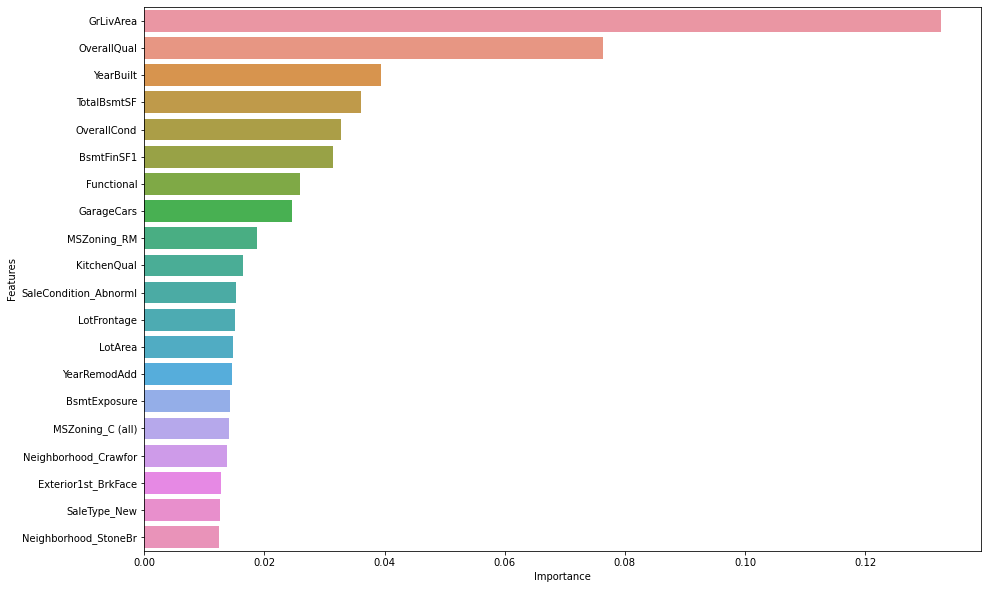

In [30]:
# plot importance of the features
plt.figure(figsize=(15, 10))
sns.barplot(data=df_importance_elasticnet_sorted.head(20), x='Importance', y = 'Features')

The class `ElasticNetCV` can be used to set the parameters `alpha` ($\alpha$) and `l1_ratio` ($r$) by cross-validation.

In [31]:
model_elasticNetCV = ElasticNetCV(alphas=np.arange(0.0001,0.01,0.0001),
                                  l1_ratio=np.arange(0.1,1,0.1), cv=5)

# We train the model
fit_elasticNetCV = model_elasticNetCV.fit(x_train_scaled, y_train)

print(fit_elasticNetCV.alpha_)
print(fit_elasticNetCV.l1_ratio_)


0.0098
0.4


So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

## 4.5 Robustness regression


### Huber Regression



The *HuberRegressor* applies a linear loss to samples that are classified as [outliers](https://en.wikipedia.org/wiki/Outlier). A sample is classified as an outlier if the absolute error of that sample is lesser than a certain threshold. It does not ignore the effect of the outliers but gives a lesser weight to them.

The loss function that HuberRegressor minimizes is given by

$$J(\boldsymbol{\theta})= \sum_{i=1}^{m}(\sigma+H_{\epsilon}(\frac{\boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)}}{\sigma})\sigma)+\alpha||\boldsymbol{\theta}||_{2}^{2}$$

where

$$H_{\epsilon}(z)=\begin{cases}
       z^{2} ,&\quad\text{if}|z|\le\epsilon\\
       2\epsilon|z|-\epsilon^{2} ,&\quad\text{otherwhise}\\
     \end{cases}$$

In [32]:
model = HuberRegressor(alpha=0.006,epsilon=3.6,max_iter=1000)

# We train the model
fit_huber = model.fit(x_train_scaled, y_train)

In [33]:
# Coefficient of determination R^2
print('Explained variance in training: %.3f' % fit_huber.score(x_train_scaled, y_train))
print('Explained variance in test set: %.3f' % fit_huber.score(x_test_scaled, y_test))

# Mean squared error
y_pred_train = fit_huber.predict(x_train_scaled)
y_pred_test = fit_huber.predict(x_test_scaled)
print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))



Explained variance in training: 0.950
Explained variance in test set: 0.899
Mean squared error in training set: 0.0082
Mean squared error in test set: 0.0143


We can tune some hyperparameters of the model.

In [34]:
# We choose the model
model_huber = HuberRegressor()

# We input possible values of parameters
param_grid = {
    'epsilon': np.arange(1,5,0.1),
    'alpha': np.arange(0.001,0.01,0.005),
}
clf = GridSearchCV(model_huber, param_grid, cv=5, n_jobs=5)

# We train the model for diferent values of parameters
clf.fit(x_train_scaled, y_train)

clf.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'alpha': 0.006, 'epsilon': 3.6000000000000023}

## 4.6 Stochastic Gradient Descent - SGD


Alternatively to the Normal equation, we can estimate the parameters of the regression linear model using an interative algorithm like gradient descent. SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time. More info about gradient descent algorithm [here](https://github.com/victorviro/ML_algorithms_python/blob/master/Introduction_gradient_descent_algorithm.ipynb).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm $l_2$ or the absolute norm $l_1$ or a combination of both (Elastic Net).

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large.

The classes `SGDRegressor` provides functionality to fit linear models for regression using different (convex) loss functions and different penalties.


In [35]:
model_SGD = SGDRegressor()

# We input possible values of parameters
param_grid = {
    'alpha': np.arange(0.01,0.1,0.01),
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

grid_SGD = GridSearchCV(model_SGD, param_grid, cv=5, n_jobs=5)

# We train the model
fit_SGD = grid_SGD.fit(x_train_scaled, y_train)
print(fit_SGD.best_params_)

{'alpha': 0.02, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'elasticnet'}


In [36]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_SGD.score(x_train_scaled, y_train))
print('Explained variance in test set: %.3f' % fit_SGD.score(x_test_scaled, y_test))

# Mean squared error
y_pred_train = fit_SGD.predict(x_train_scaled)
y_pred_test = fit_SGD.predict(x_test_scaled)
print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))


Explained variance in training set: 0.917
Explained variance in test set: 0.885
Mean squared error in training set: 0.0136
Mean squared error in test set: 0.0164


A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. We can implement this setting the parameter `warm_start=True` when we define the `SGDRegressor` model.

**Note** With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better).

# References


- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

- [Github: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://github.com/ageron/handson-ml2)

- [Standford notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf)


